In [1]:
import numpy as np
from matplotlib import pyplot as plt
from pylab import rcParams
import pandas as pd

In [122]:
def DATASET(filename):
    lineses=[]
    with open(filename) as file_handler:
        for line in file_handler:
            lineses.append(line.split())
    toplot=[]
    for line in lineses:
        if line:
            try:
                toplot.append(float(line[0]))
                toplot.append(float(line[1]))
            except:
                pass
    appends=[[],[]]
    j=0
    d_nums={}
    for i in range(0,len(toplot)-1):
        if i%2==0:
            appends[0].append(toplot[i])
        else:
            appends[1].append(toplot[i])
        if toplot[i+1]==0.0:
            d_nums['part'+str(j)]=appends
            appends=[[],[]]
            j+=1
    apps=[]
    for els in list(d_nums.values()):
        if len(els[0])>10:
            apps.append([els[0][0],els[0][1]])
    ### Выравнивание длин Х и Parametra (MV or T)
    trying=False
    while trying==False:
        trying=True
        for i in range(len(d_nums.keys())):
            if len(d_nums['part'+str(i)][0])!=len(d_nums['part'+str(i)][1]):
                mini=min(len(d_nums['part'+str(i)][0]),len(d_nums['part'+str(i)][1]))
                d_nums['part'+str(i)][0]=d_nums['part'+str(i)][0][:mini]
                d_nums['part'+str(i)][1]=d_nums['part'+str(i)][1][:mini]
                trying=False
    ##Фомирование массива данных с нулями
    true_data_withlen0=[]
    for i in range(len(d_nums.keys())):
        if len(d_nums['part'+str(i)][0])!=len(d_nums['part'+str(i)][1]):
            print(i)
        if len(d_nums[list(d_nums.keys())[i]][0])>50:
            df1 = pd.DataFrame({'X':d_nums['part'+str(i)][0],'MV':d_nums['part'+str(i)][1]} )
            true_data_withlen0.append(['Part'+str(i),np.array(df1[df1.X<0.34].X),np.array(df1[df1.X<0.34].MV)])
    ### зачистка от нулей
    true_data=[]
    for i in range(len(true_data_withlen0)):
        if len(true_data_withlen0[i][1]):
            true_data.append(true_data_withlen0[i])
    max_values_mv=[]
    for els in true_data:
        max_values_mv.append(max(els[2][-11:]))
    max_values_mv=np.array(max_values_mv)
    print('mean of max values',max_values_mv.mean())
    
    return(true_data)

In [123]:
true_data_MV=DATASET("fileMV.xy")
true_data_T=DATASET("fileTT.xy")

mean of max values 52.368857225130895
mean of max values 215.4757963350786


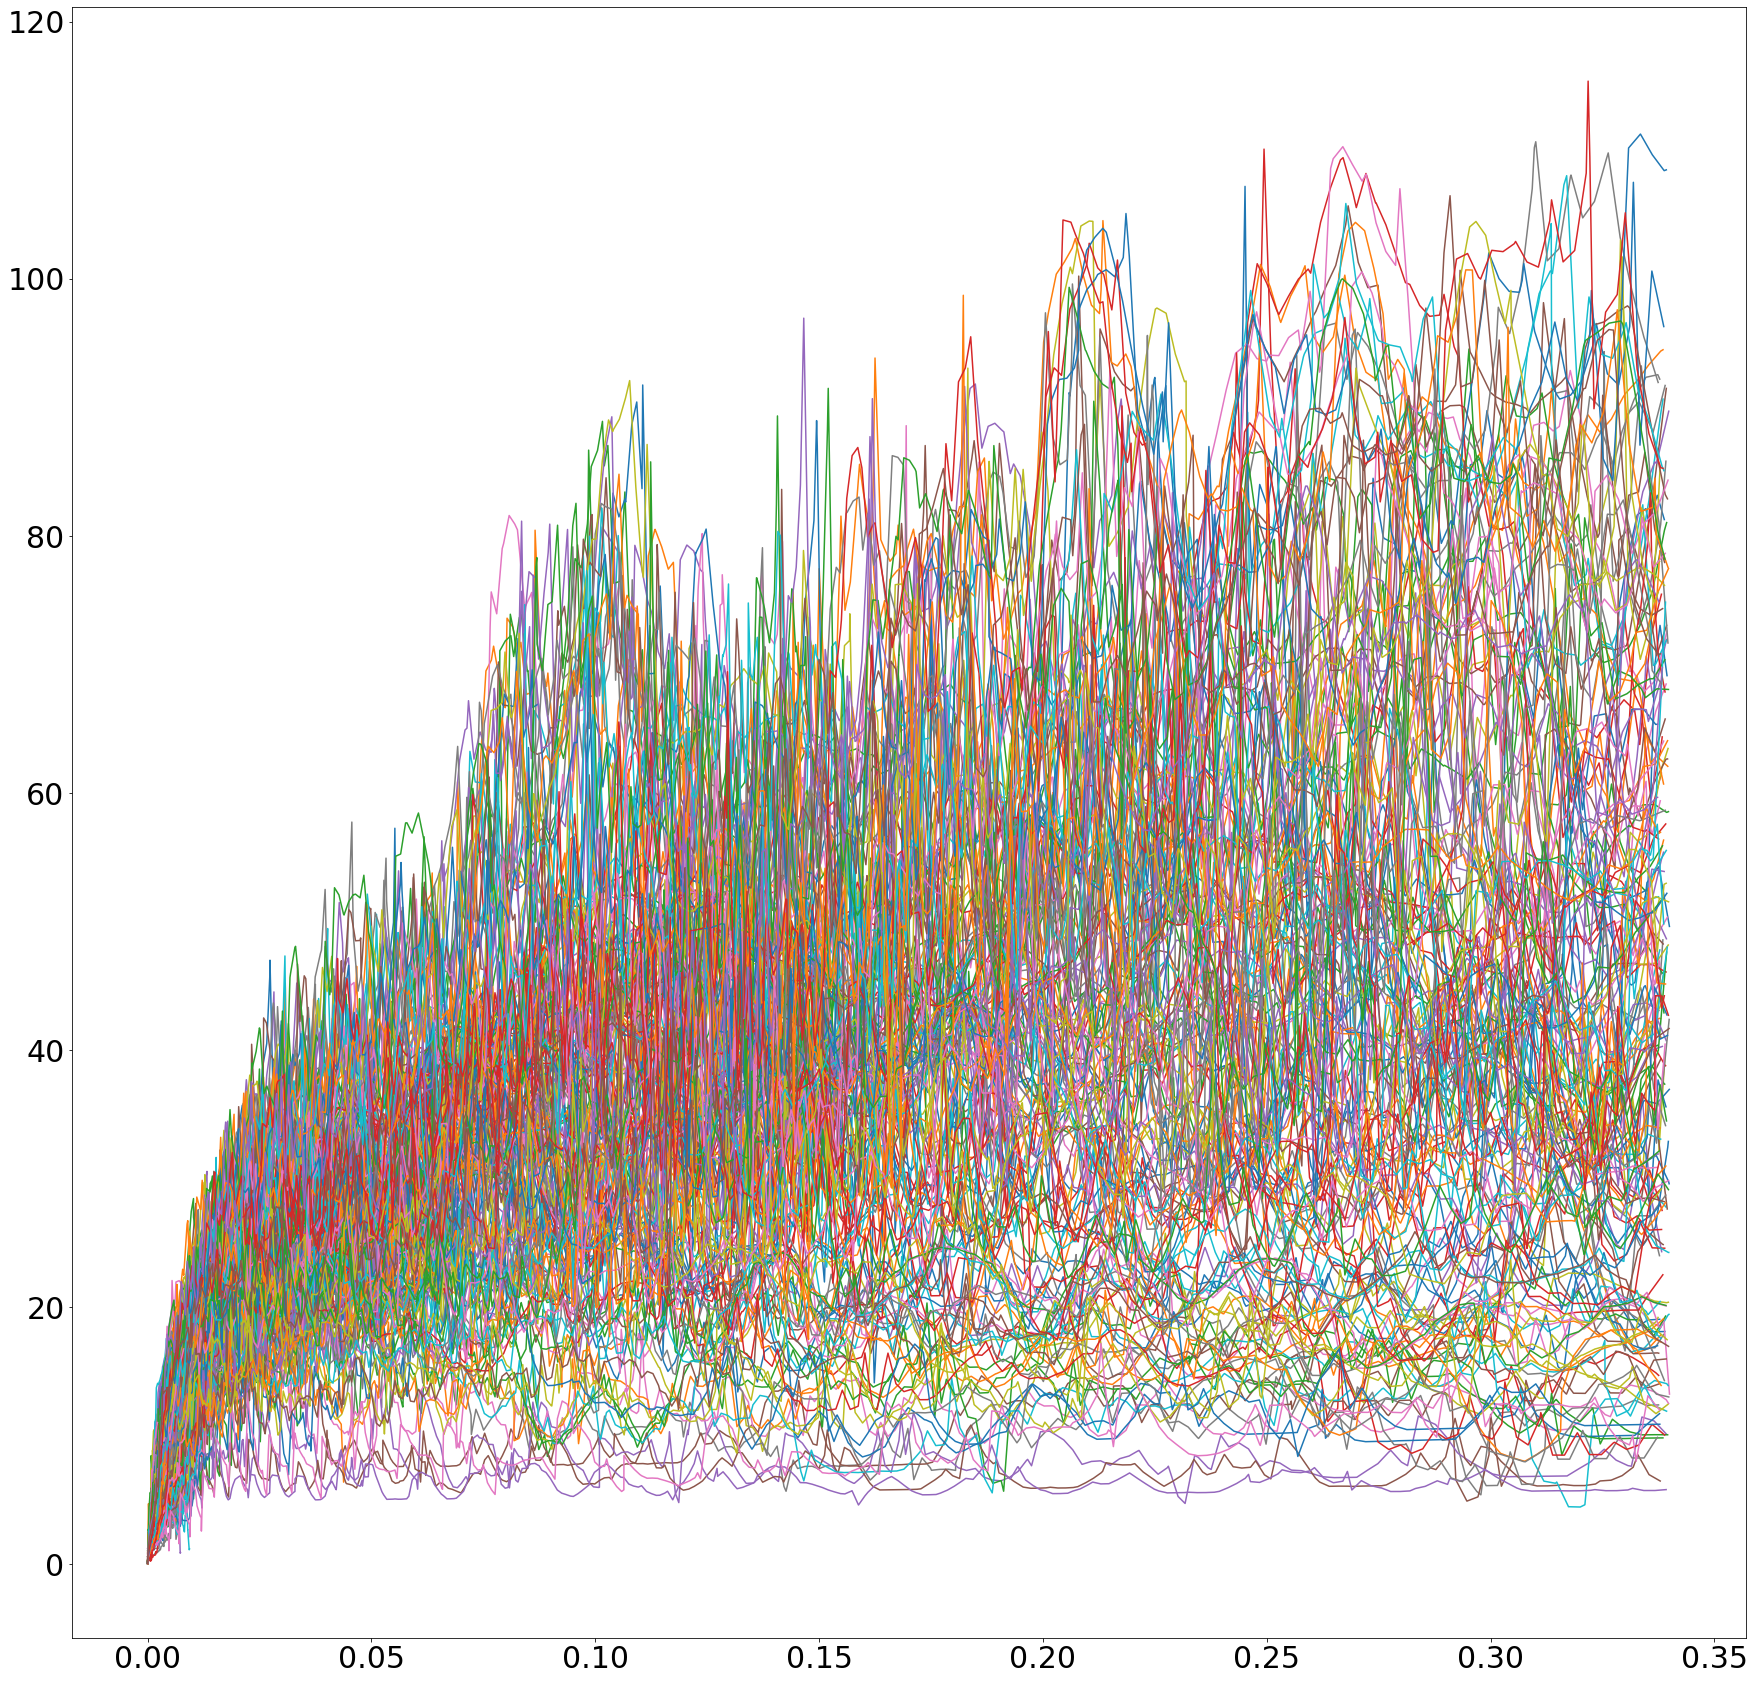

In [16]:
from matplotlib import pyplot as plt
from pylab import rcParams
plt.figure()
rcParams['figure.figsize'] = 30, 30
for els in true_data:
    plt.plot(np.array(els[1]),np.array(els[2]))
plt.show()

In [124]:
class Particle():
 
    def __init__(self,X, T,
                 MV):
        self.X=np.array(X)
        self.T = np.array(T)+300
        self.MV = np.array(MV)

In [101]:
part0=Particle(true_data_MV[0][1],true_data_MV[0][2],true_data_T[0][1])

In [109]:
part0.T.mean()

325.1790735263383

In [69]:
len(true_data)

186

In [139]:
Particles=[Particle(true_data_MV[i][1],true_data_MV[i][2],true_data_T[i][1]) for i in range(len(true_data))]

In [188]:
max([Particles[i].T for i in range(len(Particles))])

ValueError: operands could not be broadcast together with shapes (438,) (462,) 

In [193]:
max([Particles[i].T.max() for i in range(len(Particles))])

415.507

In [175]:
Particles=[]
for i in range(len(true_data_MV)):
    dfr=pd.DataFrame({'X':true_data_MV[i][1],'MV':true_data_MV[i][2],'T':true_data_T[i][2]+300})
    Particles.append(Particle(dfr.X,dfr.MV,dfr.T))

In [179]:
Particles[0].T

array([300.0598492, 300.0598492, 300.0635995, 300.0706656, 300.07819  ,
       300.0862673, 300.0949743, 300.104355 , 300.114482 , 300.125423 ,
       300.13727  , 300.150115 , 300.164064 , 300.179223 , 300.195708 ,
       300.213635 , 300.233131 , 300.254326 , 300.277374 , 300.302501 ,
       300.330109 , 300.361504 , 300.398046 , 300.441822 , 300.498229 ,
       300.578483 , 300.578391 , 300.703901 , 300.704169 , 300.910132 ,
       300.912335 , 301.24566  , 301.24758  , 301.75085  , 301.75134  ,
       301.75298  , 302.77148  , 302.71219  , 302.81558  , 302.77778  ,
       302.61498  , 303.63244  , 303.96932  , 304.00868  , 304.41516  ,
       307.1887   , 307.64018  , 307.3179   , 307.35862  , 307.73004  ,
       307.68331  , 307.49561  , 311.5805   , 311.5708   , 311.6158   ,
       308.76709  , 308.92065  , 308.8476   , 309.76166  , 309.79716  ,
       309.48765  , 309.82757  , 312.7747   , 309.76526  , 309.26169  ,
       311.4136   , 311.1159   , 311.5487   , 310.6823   , 311.7

In [1]:
40/3600

0.011111111111111112